<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 12**

## **Contenido**

- <a href="#con"> Conjuntos de entrenamiento y prueba</a><br>
- <a href="#met"> Métricas</a><br>
- <a href="#pre"> Preprocesado: </a><br>
  - <a href="#sel"> Selección de características</a><br>

<p><a name="con"></a></p>

# **Conjuntos de entrenamiento y prueba**

* **Datos de entrenamiento**: Conjunto de datos que introducimos al algoritmo para entrenar el modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión del modelo pero que no se utiliza para entrenarlo.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
X = df[["FUELCONSUMPTION_CITY"]]
y = df["CO2EMISSIONS"]

X.shape

(1067, 1)

Para dividir los datos en los conjuntos de entrenamiento y prueba podemos usar la función `train_test_split` del submódulo `model_selection` de Sklearn. Se suelen utilizar el 80% de los datos para el entrenamiento y el 20% restante para la validación.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((853, 1), (214, 1))

Entrenemos el modelo con el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [ ]:
model.intercept_, model.coef_

(72.30034696760055, array([13.85179628]))

<p><a name="met"></a></p>

# **Métricas**

Una vez el modelo esta entrenado, necesitamos evaluar si este realiza buenas o malas predicciones. Para esto haremos uso de las llamadas [*métricas*](https://scikit-learn.org/stable/modules/model_evaluation.html) que nos permitirán cuantificar el rendimiento de nuestro modelo

* **Coeficiente de determinación**: Este mide la proporción de la varianza en la variable dependiente que puede ser predicha de la(s) variable(s) independiente. 

\begin{equation}
R^2 = 1 - \frac{\sum_i  (y_i - \hat y_i)^2}{\sum_i  (y_i - \overline y)^2}
\end{equation}

donde $y$ son las etiquetas observadas, $\hat{y}$ son los valores predichos y $\bar{y}$ es el valor medio de la variable.

* Un modelo que prediga correctamente todas las etiquetas tendrá un $R^2 = 1$ 

* Un modelo que prediga siempre el valor constante $\bar{y}$ tendrá un $R^2 = 0$

* Modelos con una predicción peor que la media tendrá $R^2 < 0$


In [ ]:
from sklearn.metrics import r2_score

Para evaluar la métrica debemos obtener las predicciones del modelo utilizando los datos de prueba, que como ya vimos se obtienen mediante el método `predict`

In [ ]:
y_pred = model.predict(X_test)

La métrica toma como argumentos las etiquetas reales y predichas

In [ ]:
r2_score(y_test, y_pred)

0.8184231533160797

El estimador `LinearRegression` incorpora el método `score` que nos permite evaluar el modelo sin pasar por el proceso de predicción. Simplemente tenemos que pasar los datos de prueba:

In [ ]:
model.score(X_test, y_test)

0.8184231533160797

**Ejercicio 1:** Entre un modelo de regresión lineal utilizando todas las variables numéricas y obtenga el coeficiente de determinación $R^2$ 

***Ayuda:*** *Utilice el método* `select_dtypes`

In [ ]:
X = df.select_dtypes(exclude="object").drop(columns="CO2EMISSIONS")
X.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,2.0,4,9.9,6.7,8.5,33
1,2014,2.4,4,11.2,7.7,9.6,29
2,2014,1.5,4,6.0,5.8,5.9,48
3,2014,3.5,6,12.7,9.1,11.1,25
4,2014,3.5,6,12.1,8.7,10.6,27


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

0.9034041224574011

Ahora que hemos visto cómo se da la evaluación de los modelos de ML, mediante los conceptos de conjuntos de entrenamiento y prueba, tenemos una primera visión más general de cómo es el proceso para la implementación de un sistema de ML. Más adelante veremos técnicas más completas para la validación de los modelos.


<p><a name="pre"></a></p>

# **Preprocesado**

En la siguiente figura vemos el flujo que normalmente se encuentra en la construcción de un sistema de ML: primero se recolectan los datos, y antes de entrenar los modelos, se necesita realizar una limpieza de los datos y una serie de transformaciones sobre estos de manera que se mejore el rendimiento del modelo final 


<p><img alt="Colaboratory logo" height="340px" src="https://i.imgur.com/Q5C8NGb.png" align="left" hspace="10px" vspace="0px"></p>

Elegir las características correctas, independiente de la tarea, es un proceso muy importante para la construcción de un buen modelo final. Unas buenas características van a facilitar el proceso de modelado. Por el contrario, malas características pueden requerir la construcción de un modelo mucho más complejo para lograr el mismo nivel de rendimiento.

La cantidad de características también es importante: Si no hay suficientes características informativas, el modelo no podrá realizar la tarea final. Si hay demasiadas características, o si la mayoría de ellas son irrelevantes, entonces el entrenamiento del modelo será más complicado y costoso computacionalmente.

A este proceso de definir las características más apropiadas dado un conjunto datos, una tarea y un modelo se conoce como *ingeniería de características*

<p><a name="sel"></a></p>

# **Selección de características**

La estrategia más obvia para seleccionar las mejores caracteristicas es estudiar la correlación que hay entre las variables predictoras y la variable objetivo.

**Correlación**: La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada una de estas pruebas de correlación tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación:

* En la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

Antes que nada, veamos las distribuciones de las caracteristicas y sus relaciones para tener una primera idea de cómo estas están dispuestos. De nuevo, seleccionemos únicamente las variables numéricas y evaluemos qué tan correlacionadas están las variables

In [ ]:
num_df = df.select_dtypes(exclude="object").drop(columns=["MODELYEAR", "CYLINDERS"])
num_df.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,33,196
1,2.4,11.2,7.7,9.6,29,221
2,1.5,6.0,5.8,5.9,48,136
3,3.5,12.7,9.1,11.1,25,255
4,3.5,12.1,8.7,10.6,27,244


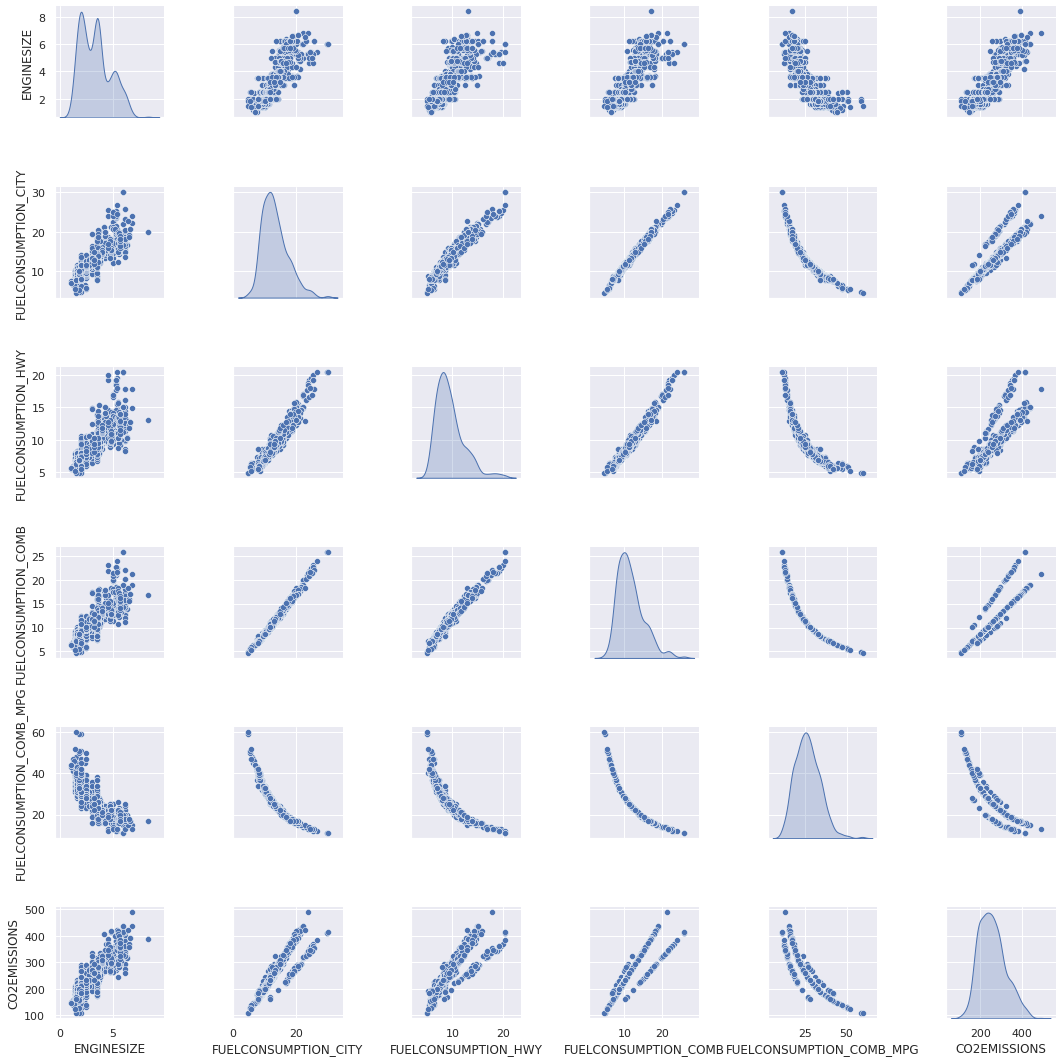

In [ ]:
sns.pairplot(data=num_df, diag_kind="kde");

Con esto tenemos una primera noción visual de la relación entre las variables: cuáles tienen una relación lineal (positiva o negrativa) con la variable objetivo y cómo son las distribuciones (normales o no) de cada una de las variables. Sin embargo, esta información la vamos a querer cuantificar. Podemos utilizar algunas pruebas estadísticas para obtener esta información, ya sea con las pruebas de correlación o con algunas pruebas estadísticas de hipótesis para el caso de la normalidad y la homogeneidad de las varianzas



**Pruebas estadísticas de hipótesis**


Una prueba estadística de hipótesis es un método de inferencia estadística, en la que se plantea una hipótesis nula y una hipótesis alternativa respecto a alguna distribución de los datos. Básicamente estas pruebas nos especifican qué resultados de un estudio pueden llevarnos a un rechazo de la hipótesis nula con cierto nivel de significancia estadística que se define previo a la prueba. El resultado de la prueba se expresa normalmente con un puntaje de la prueba (*test score*) y lo que conocemos como un valor p (*p-value*), que está entre 0 y 1. Un valor p pequeño significa que hay evidencia más sólida a favor de la hipótesis alternativa.

Las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest` y `levene`, respectivamente, ambas pertenecientes al módulo `scipy.stats`. 

In [ ]:
from scipy.stats import skewtest, levene

# probar la hipótesis nula de que la asimetría de la población de la que 
# se extrajo la muestra es la misma que la de una distribución normal

print(skewtest(df["FUELCONSUMPTION_CITY"]))
print(skewtest(df["CO2EMISSIONS"]))

SkewtestResult(statistic=10.45428443386526, pvalue=1.4005194412270905e-25)
SkewtestResult(statistic=6.573488964119975, pvalue=4.9149717907348655e-11)


In [ ]:
# probar la hipótesis nula de que las muestras de entrada provienen de poblaciones con varianzas iguales
levene(df["CO2EMISSIONS"],df["FUELCONSUMPTION_CITY"])

LeveneResult(statistic=1650.57068629174, pvalue=9.626469469029949e-268)

**Transformaciones**

Sklearn nos proporciona el transformador `FunctionTransformer` del submódulo `preprocessing`, a partir del cual podemos implementar un transformador utilizando una función arbitraria




In [ ]:
from sklearn.preprocessing import FunctionTransformer

Las transformaciones sobre los datos pueden ayudar en algunos algoritmos de aprendizaje a mejorar el rendimiento del modelo final o hacer el proceso de entrenamiento más eficiente computacionalmente. 

Por ejemplo, podemos transformar nuestros datos de manera que estos tengan una distribución más normal, relaciones lineales y varianzas más homogéneas de tal manera que tengamos más certeza de los resultados de la prueba de correlación de Pearson que tiene ciertas suposiciones sobre los datos.

Ahora, ¿qué función podríamos aplicar? Consideremos la función logaritmo:

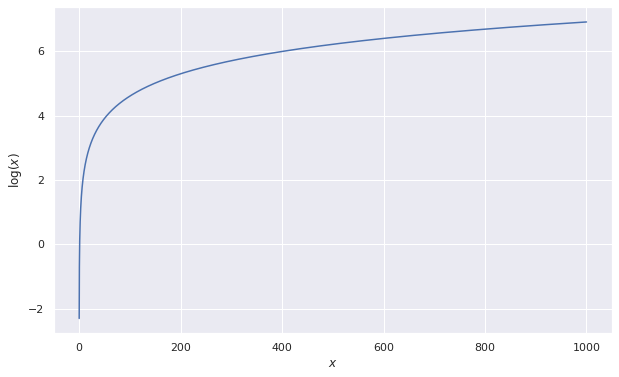

In [ ]:
x = np.linspace(0.1,1000,10000)

plt.figure(figsize=(10,6))
plt.plot(x, np.log(x))
plt.xlabel("$x$")
plt.ylabel("$\log(x)$");

A medida que $x$ se hace mayor, $\log(x)$ crece más lentamente. Note cómo el rango (200,1000) en $x$ se comprime en un pequeño rango, mientras que los valores de $x$ menores a 200 se mapean al resto del rango en $y$, que es mucho mayor. La función $\log(x)$ tiene la propiedad de comprimir los rangos de números grandes y expandir los rangos de números pequeños. 

La transformación con la función $\log$ puede ser una herramienta útil para tratar con distribuciones con "colas" largas, ya que esta comprime la cola larga de la distribución en un rango más corto y expande el extremo opuesto en un rango mayor

In [ ]:
# inicializamos el transformador
log_transform = FunctionTransformer(np.log)

# obtenemos una version transformada de los datos
# a partir de la transformacion definida 
log_num_df = log_transform.transform(num_df)

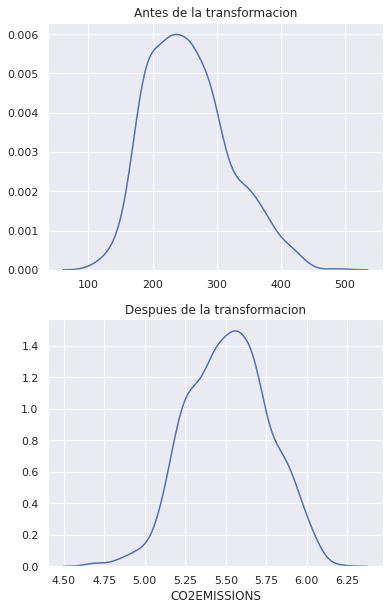

In [ ]:
# normalidad

fig, ax = plt.subplots(2,1, figsize=(6,10))

sns.kdeplot(num_df.CO2EMISSIONS, ax=ax[0])
sns.kdeplot(log_num_df.CO2EMISSIONS, ax=ax[1])

ax[0].set(title="Antes de la transformacion", xlabel="", ylabel="")
ax[1].set(title="Despues de la transformacion", ylabel="");

In [ ]:
# probar la hipótesis nula de que la asimetría de la población de la que 
# se extrajo la muestra es la misma que la de una distribución normal
print(skewtest(log_num_df["FUELCONSUMPTION_CITY"]))
print(skewtest(log_num_df["CO2EMISSIONS"]))

SkewtestResult(statistic=0.43240321866117487, pvalue=0.6654483792015433)
SkewtestResult(statistic=-1.138033945011263, pvalue=0.2551063083361612)


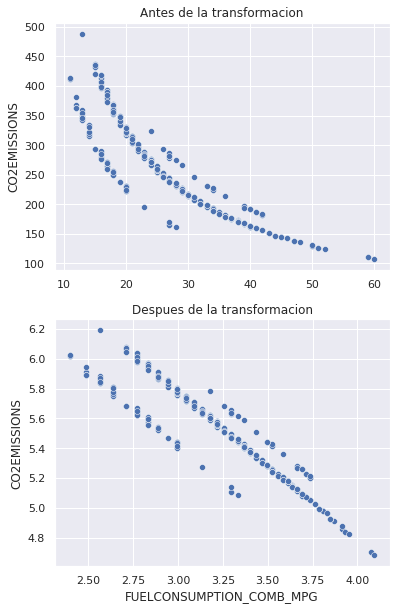

In [ ]:
# Linealidad

fig, ax = plt.subplots(2,1, figsize=(6,10))

sns.scatterplot(data=num_df, x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", ax=ax[0])
sns.scatterplot(data=log_num_df, x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", ax=ax[1])

ax[0].set(title="Antes de la transformacion", xlabel="")
ax[1].set(title="Despues de la transformacion");

Podemos cuantificar la correlación utilizando el método `corr` de Pandas

In [ ]:
# correlacion de Pearson con los datos transformados

corr = log_num_df.corr()
corr.sort_values(by="CO2EMISSIONS", ascending=False)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
CO2EMISSIONS,0.867936,0.934548,0.899545,0.931209,-0.929868,1.000000
FUELCONSUMPTION_CITY,0.844647,1.000000,0.957360,0.994401,-0.993570,0.934548
FUELCONSUMPTION_COMB,0.842699,0.994401,0.982331,1.000000,-0.999147,0.931209
FUELCONSUMPTION_HWY,0.812259,0.957360,1.000000,0.982331,-0.981436,0.899545
ENGINESIZE,1.000000,0.844647,0.812259,0.842699,-0.841870,0.867936
FUELCONSUMPTION_COMB_MPG,-0.841870,-0.993570,-0.981436,-0.999147,1.000000,-0.929868


In [ ]:
# correlacion de spearman con los datos originales

corr = num_df.corr(method="spearman")
corr.sort_values(by="CO2EMISSIONS", ascending=False)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
CO2EMISSIONS,0.889973,0.949859,0.936560,0.953496,-0.952809,1.000000
FUELCONSUMPTION_COMB,0.879171,0.995949,0.984117,1.000000,-0.999126,0.953496
FUELCONSUMPTION_CITY,0.885117,1.000000,0.965144,0.995949,-0.995310,0.949859
FUELCONSUMPTION_HWY,0.849250,0.965144,1.000000,0.984117,-0.983202,0.936560
ENGINESIZE,1.000000,0.885117,0.849250,0.879171,-0.878453,0.889973
FUELCONSUMPTION_COMB_MPG,-0.878453,-0.995310,-0.983202,-0.999126,1.000000,-0.952809


Visualicemos esta información con un mapa de calor

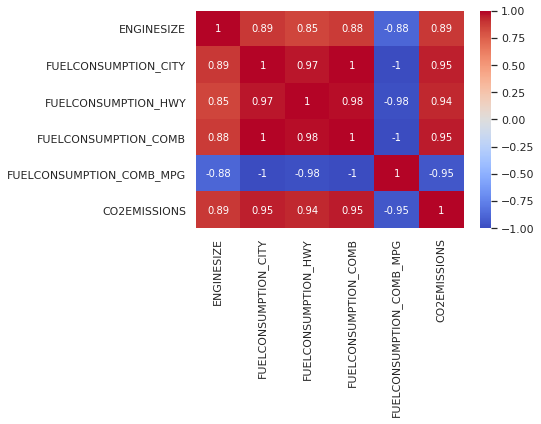

In [ ]:
sns.heatmap(data=corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm');

Cuando tenemos varias características que están altamente correlacionadas, aparece el problema de la multicolinealidad, el cual hace que el modelo se vuelva inestable, por lo que pequeñas variaciones en los datos puede causar grandes cambios en el modelo, y hace que la interpretación del modelo sea más compleja

**Ejercicio 2:** Construya una función que tenga como entrada la matriz de características $X$, la variable objetivo $y$ y la semilla para el kwarg `random_state` de la función `train_test_split`. Esta debe separar los datos en los conjuntos de entrenamiento y prueba, entrenar un modelo de regresión lineal y mostrar como salida el coeficiente de determinación $R^2$ y los parámetros del modelo.

In [ ]:
def LR(X, y, seed=42):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

  LR = LinearRegression().fit(X_train, y_train)

  print(f"R2: {LR.score(X_test, y_test)}")
  print(f"w0: {LR.intercept_}")
  print(f"W: {LR.coef_}")

Con la función creada, entrenemos dos modelos utilizando todas las características numéricas, pero con diferentes instancias en cada caso:

In [ ]:
X = num_df.drop(columns="CO2EMISSIONS")
y = num_df[["CO2EMISSIONS"]]

In [ ]:
LR(X, y)

R2: 0.8954453984309131
w0: [274.32598726]
W: [[ 16.92495019 -11.07003951  -6.74771828  20.93877705  -4.00887053]]


In [ ]:
LR(X, y, 200)

R2: 0.887176552270024
w0: [274.37549198]
W: [[17.38543453 -9.7076196  -4.25172932 17.16230654 -4.00216915]]


Seleccionemos ahora algunas características que están menos correlacionadas entre sí

In [ ]:
X = df[["ENGINESIZE","FUELCONSUMPTION_CITY"]]

In [ ]:
LR(X, y)

R2: 0.8714766559984765
w0: [81.7328305]
W: [[18.54175553  8.48132664]]


In [ ]:
LR(X, y, 200)

R2: 0.8645270833526093
w0: [81.1442799]
W: [[19.00034641  8.38917726]]


Note en este caso la estabilidad de los parámetros (hay una menor variación utilizando diferentes datos para el entrenamiento, esto es, diferentes semillas)

Una alternativa diferente para la selección de características es utilizar la función `SelectKBest` del submódulo [`feature_selection`](https://scikit-learn.org/stable/modules/feature_selection.html) de Sklearn, que realiza una prueba estadística de correlación entre las diferentes características del conjunto de datos y retorna una versión transformada (reducida) del conjunto de datos con las $k$ características con mejor *score* (características más correlacionadas con la variable objetivo)

In [ ]:
from sklearn.feature_selection import SelectKBest

X = num_df.drop(columns="CO2EMISSIONS")
y = df["CO2EMISSIONS"]

X_new = SelectKBest(k=2).fit_transform(X, y)
X_new

array([[ 9.9, 33. ],
       [11.2, 29. ],
       [ 6. , 48. ],
       ...,
       [13.4, 24. ],
       [12.9, 25. ],
       [14.9, 22. ]])